# Anomalies analysis example

Install leakpro as ``` pip install -e /path/to/leakpro ```

In [1]:
import os
import pandas as pd

import sys
sys.path.append("../..")

from leakpro.synthetic_data_attacks.anomalies import return_anomalies
from leakpro.synthetic_data_attacks.linkability_utils import linkability_risk_evaluation
from leakpro.synthetic_data_attacks.inference_utils import inference_risk_evaluation
from leakpro.synthetic_data_attacks.singling_out_utils import singling_out_risk_evaluation
from leakpro.synthetic_data_attacks import plots

#Get ori and syn
n_samples = 100
DATA_PATH = "./datasets/"
ori = pd.read_csv(os.path.join(DATA_PATH, "adults_ori.csv"), nrows=n_samples)
syn = pd.read_csv(os.path.join(DATA_PATH, "adults_syn.csv"), nrows=n_samples)

### Get anomalies of synthetic data

In [2]:
syn_anom = return_anomalies(df=syn, n_estimators=1000, n_jobs=-1, verbose=True)

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    0.3s remaining:    8.0s


Unique predictions (array([-1,  1]), array([ 3, 97]))


[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    1.2s finished


In [3]:
print('Syn anom shape',syn_anom.shape)

Syn anom shape (3, 14)


### Singling-out risk analysis with anomalies

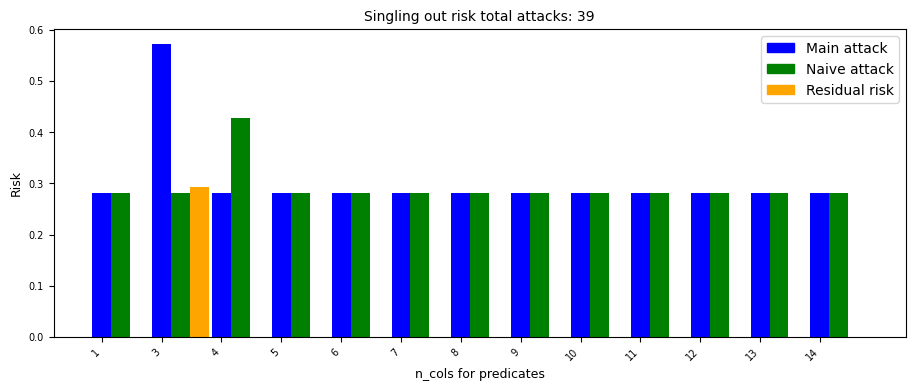

In [4]:
sin_out_res = singling_out_risk_evaluation(
    dataset = 'adults',
    ori = ori,
    syn = syn_anom,
    n_attacks = syn_anom.shape[0]
)
plots.plot_singling_out(sin_out_res=sin_out_res, high_res_flag=False)

### Linkability riks analysis with anomalies

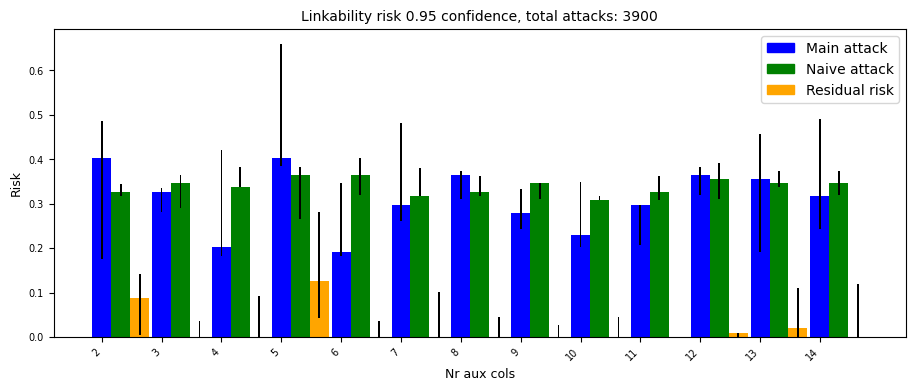

In [5]:
link_res = linkability_risk_evaluation(
    dataset = "adults",
    ori = ori,
    syn = syn_anom,
    n_samples = syn_anom.shape[0],
    n_attacks = 100
)
plots.plot_linkability(link_res=link_res, high_res_flag=False)

### Inference risk analysis with anomalies

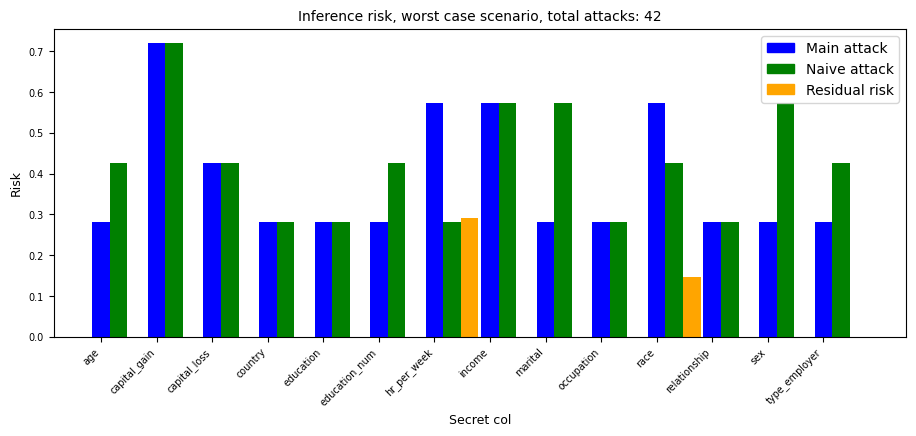

In [6]:
inf_res = inference_risk_evaluation(
    dataset = 'adults',
    ori = ori,
    syn = syn_anom,
    worst_case_flag = True,
    n_attacks = syn_anom.shape[0]
)
plots.plot_ir_worst_case(inf_res=inf_res, high_res_flag=False)